In [21]:
#! pip install --user opencv-python
#! pip install --user matplotlib
# !pip install --user seaborn
# some dependencies might need to be installed

In [147]:
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import time as t
from sklearn.preprocessing import normalize

In [140]:
IMAGE_PATH = './208.jpg'
image = cv2.imread(IMAGE_PATH)

In [141]:
def print_image(image):
    cv_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()

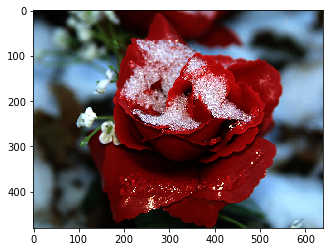

In [142]:
print_image(image)

## Ke Contrast
The constrast is based on the calculation of the aggregated RGB histogram of the image.

In [143]:
channels = cv2.split(image)
colors = ('r', 'g', 'b')

In [154]:
for (channel, color) in zip(channels, colors):
    histogram += cv2.calcHist([channel], [0], None, [256], [0, 256])

normalized_histogram = sklearn.preprocessing.normalize(histogram, norm='l1', axis=0, copy=True, return_norm=False)

Then the width of 98% mass is calculated

In [167]:
def middleMassWidth(percentage, histogram):
    bias = (int)((1 - percentage)/2)
    accumulator = 0.0
    start = 0
    for index, bin_value in enumerate(histogram):
        accumulator = accumulator + bin_value
        if(accumulator < bias):
            start = index
        if(accumulator > bias + percentage):
            return index - start - 1

In [168]:
middleMassWidth(0.98, normalized_histogram)

243

In [169]:
middleMassWidth(0.95, normalized_histogram)

220